<a href="https://colab.research.google.com/github/rdaniel58/Image-Processing/blob/main/ImageTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CS 3150.001**

Data & Image Visualization Tools

Ryan Baertlein

09/01/2022

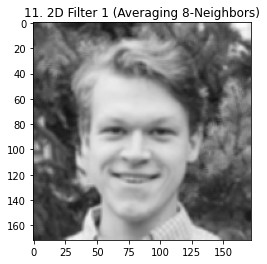

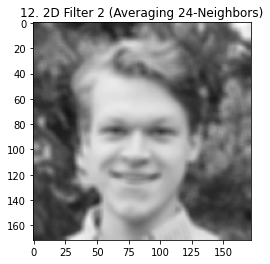

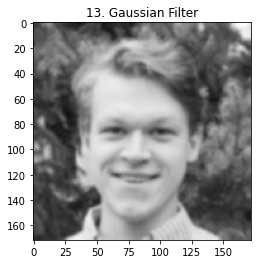

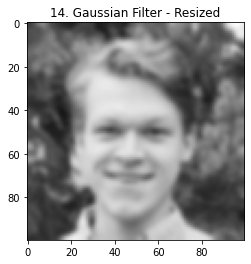

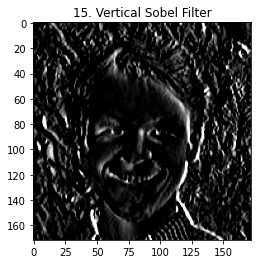

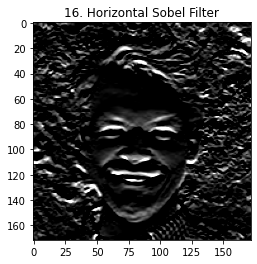

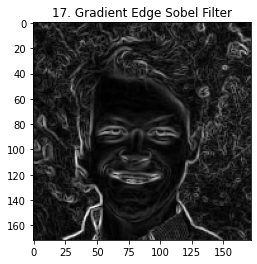

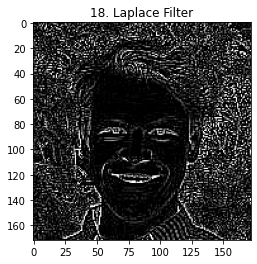

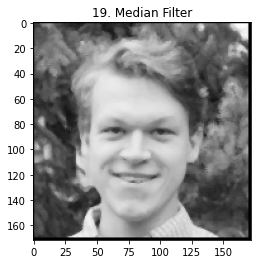

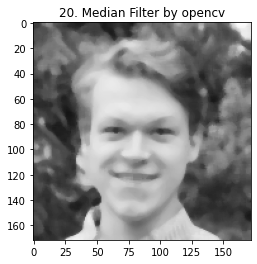

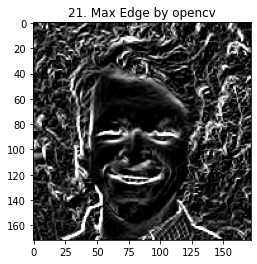

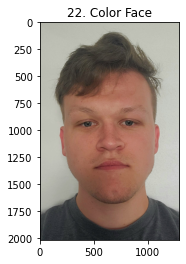

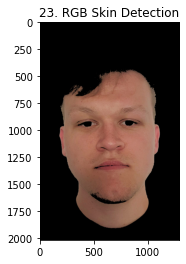

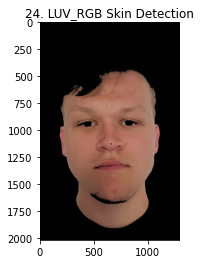

In [ ]:
import numpy as np
import cv2 
import math
import random
from matplotlib import pyplot as plt
from scipy.signal import convolve2d

# Read in image
im = cv2.imread('/content/drive/MyDrive/Assignment_1/photos/Ryan-portrait.jpg')

# Display image
plt.figure()
plt.title('1. BGR Image')
plt.imshow(im)

# Matplotlib loads images in using BGR, instead of RGB
# Convert Image to RGB
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# Display image
plt.figure()
plt.title('2. RGB Image')
plt.imshow(im_rgb)

# Convert Image to Grayscale
img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Display image
plt.figure()
plt.title('3. Grayscale Image')
plt.imshow(img,cmap='gray', vmin=0, vmax=255)

# Create Circular Border Around Image
img_circ = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
length, width = img_circ.shape
radius = 0.45 * min(length,width)
for i in range(length):     # this is the row
    for j in range(width):  # this is the column      
        if math.sqrt((i-length/2)**2 + (j-width/2)**2) > radius:
            img_circ[i,j] = 72    

# Display image
plt.figure()
plt.title('4. Circlular Border')
plt.imshow(img_circ,cmap='gray', vmin=0, vmax=255) 

# Apply Contrast Stretching to Image
img_contrast = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
img_con = np.zeros((length, width))
mx = np.amax(img_contrast)
mn = np.amin(img_contrast)
img_con = (img_contrast-mn) / (mx-mn) * 255

# Display Image
plt.figure()
plt.title('5. Contrast Stretching')
plt.imshow(img_con,cmap='gray', vmin=0, vmax=255)  

# Create Negative of Image
img_neg = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
img_n = np.zeros((length, width))
for i in range(length):     # this is the row
    for j in range(width):  # this is the column      
             img_n[i,j] = 255-img_neg[i,j]    # we don't have to loop    

# Display Image
plt.figure()
plt.title('6. Negative Image')
plt.imshow(img_n,cmap='gray', vmin=0, vmax=255)  

# Gamma / Power Law Image
img_gamup=np.zeros((length, width))
mx=np.amax(img)
mn=np.amin(img)
imgN=img/255
img_gamup=imgN**2.2   

# Display Image
plt.figure()
plt.title('7. Gamma Correction 1')
plt.imshow(img_gamup,cmap='gray', vmin=0, vmax=1) # Normalize vmax to 1 
# otherwise the max image brightness will be 1/255.

img_gamdn=np.zeros((length, width))
img_gamdn=imgN**0.5   

# Display Image
plt.figure()
plt.title('8. Gamma Correction 2')
plt.imshow(img_gamdn,cmap='gray', vmin=0, vmax=1)

# Histogram Equalization Image
imgHist = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
length2, width2 = imgHist.shape
hist = np.zeros(256)
for i in range(length2):     # this is the row
    for j in range(width2):  # this is the column  
        hist[imgHist[i,j]] = hist[imgHist[i,j]]+1   
hist_n = hist*255/hist.max()
cdf = hist.cumsum()
cdf_n = cdf * 255/ cdf.max()
#plt.figure() # Histrogram plot graph
#plt.plot(cdf_n, color = 'b') # Histrogram plot graph
#plt.plot(hist_n,color = 'r') # Histrogram plot graph
myeq = np.zeros((length2, width2))
for i in range(length2):
    for j in range(width2):
        pixel = imgHist[i][j]
        myeq[i][j] = cdf_n[pixel]

# Display Image
plt.figure()
plt.title('9. Equalized Histogram')
plt.imshow(myeq,cmap='gray', vmin=0, vmax=255)

# Histogram Equalization by opnecv
imgOCV = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
equ = cv2.equalizeHist(imgOCV)

# Display Image
plt.figure()
plt.title('10. cv2.equalizeHist')
plt.imshow(equ,cmap='gray', vmin=0, vmax=255)

# 2D Image FIltering (Averaging Filter)
img2D = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) # Load in new instance of original grayscale img to preserve originality
avg_filter1 = np.array(
    [[1/9,1/9,1/9],
     [1/9,1/9,1/9],
     [1/9,1/9,1/9]]) # Create first filter (8-neighbor)

avg_filter2 = np.array(
    [[0.04, 0.04, 0.04, 0.04, 0.04],
     [0.04, 0.04, 0.04, 0.04, 0.04],
     [0.04, 0.04, 0.04, 0.04, 0.04],
     [0.04, 0.04, 0.04, 0.04, 0.04],
     [0.04, 0.04, 0.04, 0.04, 0.04]]) # Create second filter (24-neighbor) 

gaus_ker = np.array([
       [ 1,  4,  7,  4, 1],
       [4, 16, 26, 16, 4],
       [7, 26, 41, 26, 7],
       [4, 16, 26, 16, 4],
       [1, 4, 7, 4, 1]]) # Create Gaussian filter

gaus_ker = gaus_ker / np.sum(gaus_ker)

sobel_vert = np.array(
   [[-1.0, 0.0, 1.0],
    [-2.0, 0.0, 2.0],
    [-1.0, 0.0, 1.0]]) # Create a third filter (Sobel vertical lines only)

sobel_horiz = sobel_vert.T # Create a fourth filter (Sobel horizontal lines only)

lap_kern1 = np.array([
         [0.0,  1.0, 0.0]
        ,[1.0, -4.0, 1.0]
        ,[0.0,  1.0, 0.0]
        ]) # Alternate form -- uses diagonals 

lap_kern2 = np.array([
         [1.0,  1.0, 1.0]
        ,[1.0, -8.0, 1.0]
        ,[1.0,  1.0, 1.0]
        ]) # Create a third filter (Show Laplace lines only)

# Apply avg_filter1 (or kernel) to image
average1 = cv2.filter2D(img2D,-1,avg_filter1) 

# Display Image
plt.figure()
plt.title('11. 2D Filter 1 (Averaging 8-Neighbors)')
plt.imshow(average1, cmap='gray', vmin=0, vmax=255)
### This 8-neighbor average filter moderately blurred the original grayscale image.  

# Apply avg_filter2 (or kernel) to image
average2 = cv2.filter2D(img2D,-1,avg_filter2) 

# Display Image
plt.figure()
plt.title('12. 2D Filter 2 (Averaging 24-Neighbors)')
plt.imshow(average2, cmap='gray', vmin=0, vmax=255)  
### This 24-neighbor average filter heavily blurred the original grayscale image.

# Apply Gaussian filter to image
gaus = cv2.filter2D(img2D, -1, gaus_ker)

# Display Image
plt.figure()
plt.title('13. Gaussian Filter')
plt.imshow(gaus, cmap='gray', vmin=0, vmax=255)  
### This filter seemed similar to the average 8-neighbor filter but preserved a bit more of the original image.

# Display a Resized Image
dsize = (100, 100) # new image dimensions
small = cv2.resize(img,dsize)
gaus2 = cv2.filter2D(small, -1, gaus_ker) 
plt.figure()
plt.title('14. Gaussian Filter - Resized')
plt.imshow(gaus2,cmap='gray', vmin=0, vmax=255)

# Apply sobel filters (or kernel) to image
d_horiz = convolve2d(img, sobel_horiz, mode='same', boundary = 'symm', fillvalue=0)
d_vert = convolve2d(img, sobel_vert, mode='same', boundary = 'symm', fillvalue=0)
grad = np.sqrt(np.square(d_horiz) + np.square(d_vert))
grad *= 255.0 / np.max(grad) 

# Vertical Sobel Filter
# Display Image
plt.figure()
plt.title('15. Vertical Sobel Filter')
plt.imshow(d_vert, cmap='gray', vmin=0, vmax=255) 
### This filter produced a vertical edge identifier for the image and seems moderately blurred. 

# Horizontal Sobel Filter
# Display Image
plt.figure()
plt.title('16. Horizontal Sobel Filter')
plt.imshow(d_horiz, cmap='gray', vmin=0, vmax=255)
### This filter produced a horizontal edge identifier for the image and seems moderately blurred.

# Gradient Edge by 2D Convolve
# Display Image
plt.figure()
plt.title('17. Gradient Edge Sobel Filter')
plt.imshow(grad, cmap='gray', vmin=0, vmax=255)
### This filter produced a gradient edge identifier for the image and seems slightly blurred.

# Apply laplace filter (or kernel) to image
laplacian = cv2.filter2D(img, -1, lap_kern2)

# Display Image
plt.figure()
plt.title('18. Laplace Filter')
plt.imshow(laplacian, cmap='gray', vmin=0, vmax=255)
### The laplace filter seems noisier than the sobel filters but provides a horizontal and vertical edge identifier.

# Apply Median Filter
height,width = np.shape(img2D)
median = np.zeros((height,width),dtype=float)
for i in range(1,height-2):
    for j in range(1,width-2):
        sorted_pixels = sorted(np.ndarray.flatten(img[i-1:i+2,j-1:j+2]))
        median[i][j] = sorted_pixels[5]

# Display Image
plt.figure()
plt.title('19. Median Filter')
plt.imshow(median, cmap='gray', vmin=0, vmax=255)
### The median filter removed the noise from the trees in the background as well as my hair. The image appears softer now.

# Apply Median Filter by opencv
median2 = cv2.medianBlur(img2D, 5)

# Display Image
plt.figure()
plt.title('20. Median Filter by opencv')
plt.imshow(median2,cmap='gray', vmin=0, vmax=255)

# Apply max edge by opencv
dst_vert2 = cv2.filter2D(img2D, -1, sobel_vert) 
dst_horiz2 = cv2.filter2D(img2D, -1, sobel_horiz)
maxEdge=np.maximum(dst_vert2, dst_horiz2)

# Display Image
plt.figure()
plt.title('21. Max Edge by opencv')
plt.imshow(maxEdge,cmap='gray', vmin=0, vmax=255)

# Define Skin Threshold Method
def skin_rgb_threshold( src ):
    # extract color channels and save as SIGNED ints
    # need the extra width to do subraction
    b = src[:,:,0].astype(np.int16)
    g = src[:,:,1].astype(np.int16)
    r = src[:,:,2].astype(np.int16)

    skin_mask =                                    \
          (r > 96) & (g > 40) & (b > 10)           \
        & ((src.max() - src.min()) > 15)           \
        & (np.abs(r-g) > 15) & (r > g) & (r > b)    

    return src * skin_mask.reshape(skin_mask.shape[0], skin_mask.shape[1], 1)

# Skin Detection
im_color = cv2.imread("/content/drive/MyDrive/Assignment_1/photos/Ryan-portrait2.jpg", cv2.IMREAD_COLOR)
plt.figure()
plt.title('22. RGB Portrait')
plt.imshow(cv2.cvtColor(im_color,cv2.COLOR_BGR2RGB))
# detect the skin after gamma 
#rgb = cv.cvtColor(luv, cv.COLOR_LUV2BGR)

# using thresholds from paper
skin = skin_rgb_threshold(im_color)
plt.figure()
plt.title('23. RGB Skin Detection')
plt.imshow(cv2.cvtColor(skin,cv2.COLOR_BGR2RGB))

# Define method to find local minimum using histogram
def find_local_min( hist ):

    kern = np.array(
            [2,0,0,0,
             2,0,0,0,
             2,0,0,0,
             2,0,0,0,
             1,0,0,0,
             1,0,0,0,
             1,0,0,0,
             1,0,0,0,
             -3,-3,-3,-3
             -3,-3,-3,-3
             ,0,0,0,1
             ,0,0,0,1
             ,0,0,0,1
             ,0,0,0,1
             ,0,0,0,2
             ,0,0,0,2
             ,0,0,0,2
             ,0,0,0,2])
    #// theres a lot of 0's in there what will throw off 
    #// the convolution
    hist[0] = 0
    deriv = np.convolve(hist, kern, mode='same')
    threshold = deriv.argmax()
    return threshold, deriv

# Define LUV conversion method
def skin_luv_threshold( src ):
  #// convert to LUV
  luv = cv2.cvtColor(src, cv2.COLOR_BGR2LUV)
  l = luv[:,:,0]
  u = luv[:,:,1]
  v = luv[:,:,2]
  #// get a histogram of the luminance and search for local min 
  hist, bins = np.histogram(l.ravel(), 256, [0,256])
  threshold, deriv= find_local_min(hist)
  #// simple threshold  sets all values < threshold to 0
  l = (l < threshold) * l
  #// place the adjusted l channel back into the image
  luv[:,:,0] = l
  #// convert back to rgb and use the skin detector from the paper
  rgb = cv2.cvtColor(luv, cv2.COLOR_LUV2BGR)
  return rgb

# Convert Image with LUV then run through RGB skin threshold
luv = skin_luv_threshold(im_color)
skin2 = skin_rgb_threshold(luv)

# DIsplay Image
plt.figure()
plt.title('24. LUV Skin Detection')
plt.imshow(cv2.cvtColor(skin2,cv2.COLOR_BGR2RGB))